In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from mlcolvar.utils.plot import paletteFessa
reference_committor_model = torch.jit.load('../3_committor/model_committor_reference.pt').to(torch.device('cpu'))

#### Trivial sensitivity analysis

Class 0 dataframe shape:  (8000, 17)
Class 1 dataframe shape:  (8000, 17)

 - Loaded dataframe (16000, 17): ['time', 'p.x', 'p.y', 'p.z', 'mueller', 'potential.bias', 'potential.mueller_bias', 'lwall_x.bias', 'lwall_x.force2', 'uwall_x.bias', 'uwall_x.force2', 'lwall_y.bias', 'lwall_y.force2', 'uwall_y.bias', 'uwall_y.force2', 'walker', 'labels']
 - Descriptors (16000, 2): ['p.x', 'p.y']


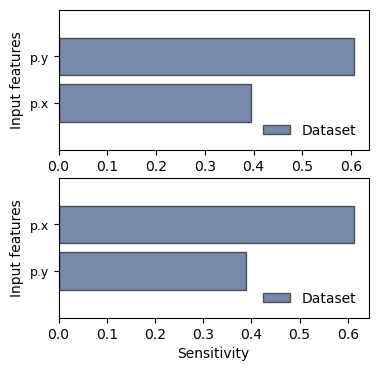

In [9]:
n_states = 2
from mlcolvar.utils.io import create_dataset_from_files

filenames = ["../1_enhanced_sampling/simulations/unbiased_sims/A/COLVAR",
             "../1_enhanced_sampling/simulations/unbiased_sims/B/COLVAR",]

dataset, dataframe = create_dataset_from_files(file_names=filenames,
                                               create_labels = True,
                                               filter_args={'regex': 'p.x|p.y'},
                                               return_dataframe=True,
                                               stop = 8000,
                                               stride=1)


from mlcolvar.explain import sensitivity_analysis

test = torch.jit.load('../3_committor/models/model_0_q.pt')

fig, axs = plt.subplots(2,1,figsize=(4,4))
results = sensitivity_analysis(test,
                               dataset,
                               metric="mean_abs_val",   # metric to use to compute the sensitivity per feature (e.g. mean absolute value or root mean square)
                               feature_names=None,      # by default, they will be taken from `dataset.feature_names`
                               per_class=False,         # whether to do per-class statistics
                               plot_mode='barh',
                               ax = axs[0])          

results = sensitivity_analysis(reference_committor_model,
                               dataset,
                               metric="mean_abs_val",   # metric to use to compute the sensitivity per feature (e.g. mean absolute value or root mean square)
                               feature_names=None,      # by default, they will be taken from `dataset.feature_names`
                               per_class=False,         # whether to do per-class statistics
                               plot_mode='barh',
                               ax = axs[1])          